# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
df.duplicated().sum()

719

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [10]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,1.590187,84.723281,23.053976,9.070676,3.813620,0.668229,0.295631,0.426635,7.279974,0.149977
std,1.016538,90.410229,33.832149,5.413099,1.991913,0.470854,0.456331,0.494593,1.496390,0.357052
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49281 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49281 non-null  int64  
 1   sales_channel          49281 non-null  object 
 2   trip_type              49281 non-null  object 
 3   purchase_lead          49281 non-null  int64  
 4   length_of_stay         49281 non-null  int64  
 5   flight_hour            49281 non-null  int64  
 6   flight_day             49281 non-null  int64  
 7   route                  49281 non-null  object 
 8   booking_origin         49281 non-null  object 
 9   wants_extra_baggage    49281 non-null  int64  
 10  wants_preferred_seat   49281 non-null  int64  
 11  wants_in_flight_meals  49281 non-null  int64  
 12  flight_duration        49281 non-null  float64
 13  booking_complete       49281 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.6+ MB


In [12]:
print(df["flight_day"].unique())
print(df["sales_channel"].unique())
print(df["trip_type"].unique())
print(df["num_passengers"].unique())
print(df["booking_origin"].unique())

[6 3 4 1 7 2 5]
['Internet' 'Mobile']
['RoundTrip' 'CircleTrip' 'OneWay']
[2 1 3 4 6 5 7 9 8]
['New Zealand' 'India' 'United Kingdom' 'China' 'South Korea' 'Japan'
 'Malaysia' 'Singapore' 'Switzerland' 'Germany' 'Indonesia'
 'Czech Republic' 'Vietnam' 'Thailand' 'Spain' 'Romania' 'Ireland' 'Italy'
 'Slovakia' 'United Arab Emirates' 'Tonga' 'Réunion' '(not set)'
 'Saudi Arabia' 'Netherlands' 'Qatar' 'Hong Kong' 'Philippines'
 'Sri Lanka' 'France' 'Croatia' 'United States' 'Laos' 'Hungary'
 'Portugal' 'Cyprus' 'Australia' 'Cambodia' 'Poland' 'Belgium' 'Oman'
 'Bangladesh' 'Kazakhstan' 'Brazil' 'Turkey' 'Kenya' 'Taiwan' 'Brunei'
 'Chile' 'Bulgaria' 'Ukraine' 'Denmark' 'Colombia' 'Iran' 'Bahrain'
 'Solomon Islands' 'Slovenia' 'Mauritius' 'Nepal' 'Russia' 'Kuwait'
 'Mexico' 'Sweden' 'Austria' 'Lebanon' 'Jordan' 'Greece' 'Mongolia'
 'Canada' 'Tanzania' 'Peru' 'Timor-Leste' 'Argentina' 'New Caledonia'
 'Macau' 'Myanmar (Burma)' 'Norway' 'Panama' 'Bhutan' 'Norfolk Island'
 'Finland' 'Nicaragua

In [13]:
deleted_column = ['booking_origin', 'route','trip_type','sales_channel']
df_new = df.drop(columns=deleted_column)

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49281 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49281 non-null  int64  
 1   purchase_lead          49281 non-null  int64  
 2   length_of_stay         49281 non-null  int64  
 3   flight_hour            49281 non-null  int64  
 4   flight_day             49281 non-null  int64  
 5   wants_extra_baggage    49281 non-null  int64  
 6   wants_preferred_seat   49281 non-null  int64  
 7   wants_in_flight_meals  49281 non-null  int64  
 8   flight_duration        49281 non-null  float64
 9   booking_complete       49281 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 4.1 MB


In [15]:
df_new.corr(method='pearson')

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.214999,-0.115380,0.016393,0.014801,0.120724,0.029509,0.022252,-0.062028,0.024092
purchase_lead,0.214999,1.000000,-0.076747,0.035112,0.036214,-0.021599,-0.004459,-0.022533,0.067934,-0.022132
length_of_stay,-0.115380,-0.076747,1.000000,-0.025525,0.000756,0.177536,0.031215,0.098846,0.140408,-0.042080
flight_hour,0.016393,0.035112,-0.025525,1.000000,0.024212,-0.010911,0.012251,0.011953,-0.003236,0.006705
flight_day,0.014801,0.036214,0.000756,0.024212,1.000000,-0.002517,0.005723,0.007799,0.019187,-0.007061
wants_extra_baggage,0.120724,-0.021599,0.177536,-0.010911,-0.002517,1.000000,0.208392,0.216835,0.057637,0.068452
wants_preferred_seat,0.029509,-0.004459,0.031215,0.012251,0.005723,0.208392,1.000000,0.315162,0.100652,0.050189
wants_in_flight_meals,0.022252,-0.022533,0.098846,0.011953,0.007799,0.216835,0.315162,1.000000,0.156233,0.026399
flight_duration,-0.062028,0.067934,0.140408,-0.003236,0.019187,0.057637,0.100652,0.156233,1.000000,-0.106529
booking_complete,0.024092,-0.022132,-0.042080,0.006705,-0.007061,0.068452,0.050189,0.026399,-0.106529,1.000000


In [16]:
df['route'].value_counts()

route
AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
          ... 
AKLHGH       1
JEDPDG       1
JEDPEN       1
DACPEK       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

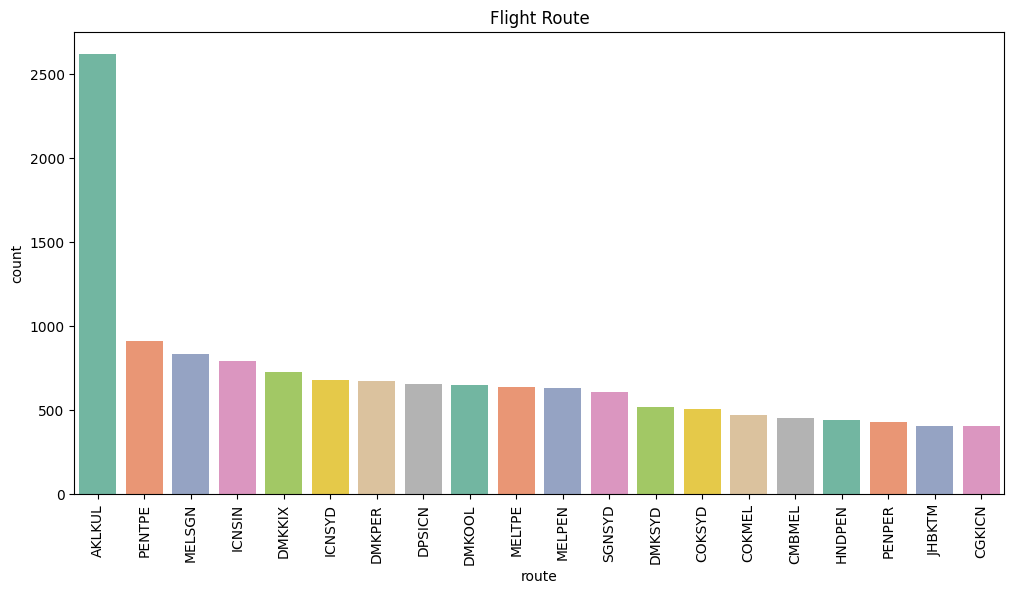

In [18]:
plt.figure(figsize=(12,6))
plt.title('Flight Route')
plt.xticks(rotation=90)
sns.countplot(x=df['route'].sort_index(), 
              data=df, 
              palette='Set2', 
              order=df.route.value_counts().iloc[:20].index,
              );

In [19]:
df['booking_origin'].value_counts().iloc[:20]

booking_origin
Australia         17691
Malaysia           7055
South Korea        4502
Japan              3819
China              3284
Indonesia          2317
Taiwan             2042
Thailand           1993
India              1258
New Zealand        1060
Singapore          1034
United States       453
Vietnam             386
Macau               301
Hong Kong           294
Philippines         265
United Kingdom      173
Brunei              161
Cambodia            131
(not set)            78
Name: count, dtype: int64

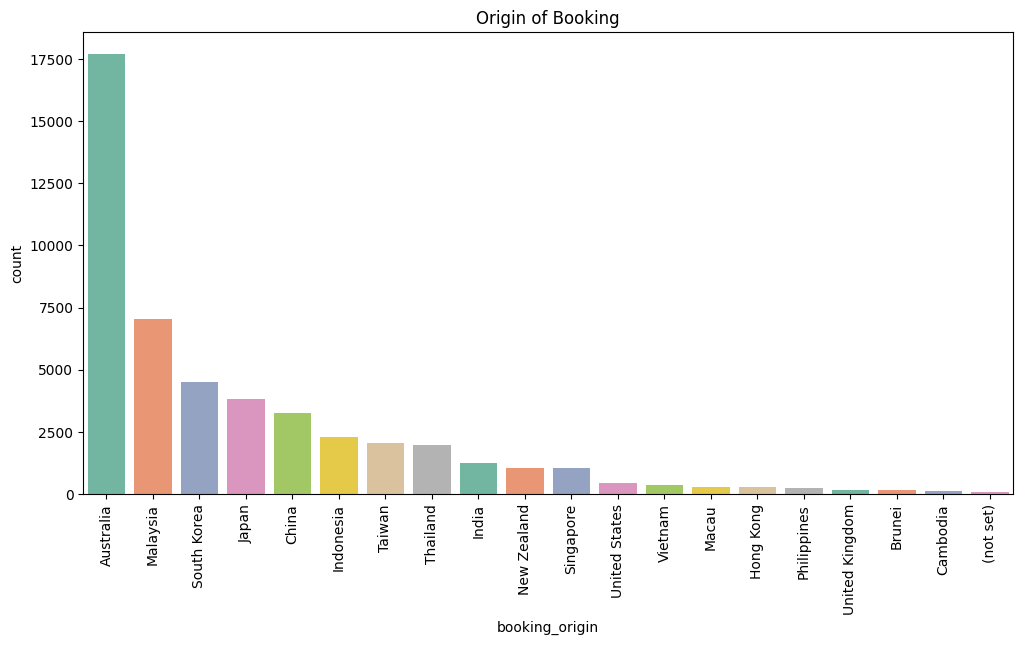

In [20]:
plt.figure(figsize=(12,6))
plt.title('Origin of Booking')
plt.xticks(rotation=90)
sns.countplot(x=df['booking_origin'].sort_index(), 
              data=df, 
              palette='Set2', 
              order=df.booking_origin.value_counts().iloc[:20].index,
              );

In [21]:
df['sales_channel'].value_counts(normalize=True)

sales_channel
Internet    0.891155
Mobile      0.108845
Name: proportion, dtype: float64

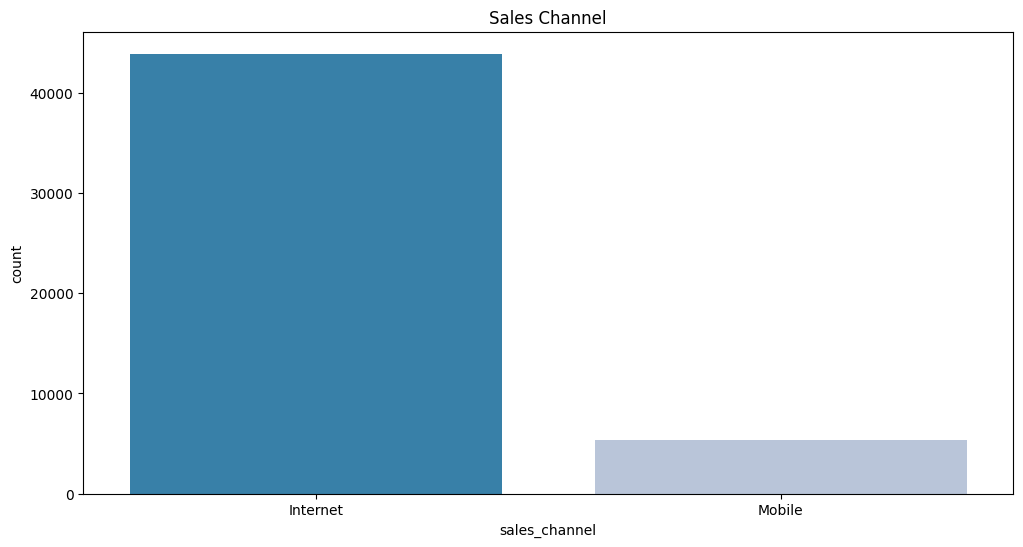

In [22]:
plt.figure(figsize=(12,6))
plt.title("Sales Channel")
sns.countplot(x=df['sales_channel'], data=df, palette='PuBu_r');

In [23]:
df['trip_type'].value_counts(normalize=True)

trip_type
RoundTrip     0.989814
OneWay        0.007833
CircleTrip    0.002354
Name: proportion, dtype: float64

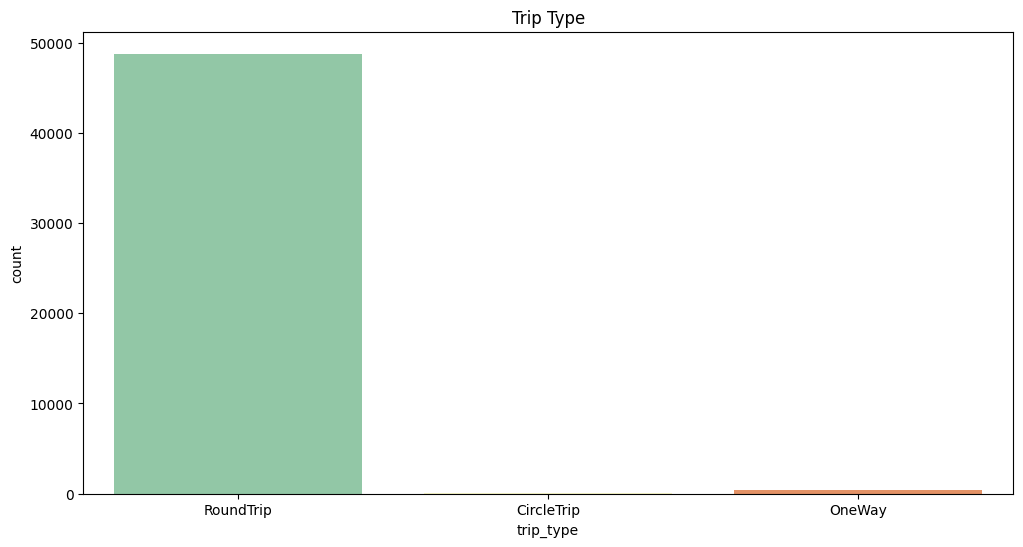

In [24]:
plt.figure(figsize=(12,6))
plt.title("Trip Type")
sns.countplot(x=df['trip_type'], data=df, palette='Spectral_r');

In [25]:
df_new['num_passengers'].value_counts(normalize=True)

num_passengers
1    0.626590
2    0.257077
3    0.058481
4    0.035856
5    0.011039
6    0.005702
7    0.002171
8    0.001786
9    0.001299
Name: proportion, dtype: float64

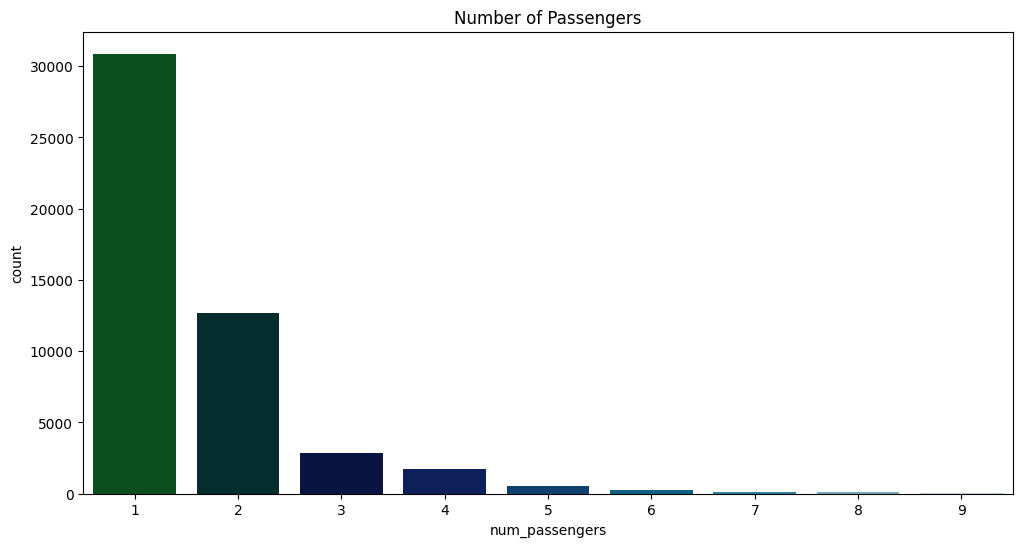

In [26]:
plt.figure(figsize=(12,6))
plt.title('Number of Passengers')
sns.countplot(x=df_new['num_passengers'], data=df_new, palette='ocean');

In [27]:
df_new['wants_extra_baggage'].value_counts(normalize=True)

wants_extra_baggage
1    0.668229
0    0.331771
Name: proportion, dtype: float64

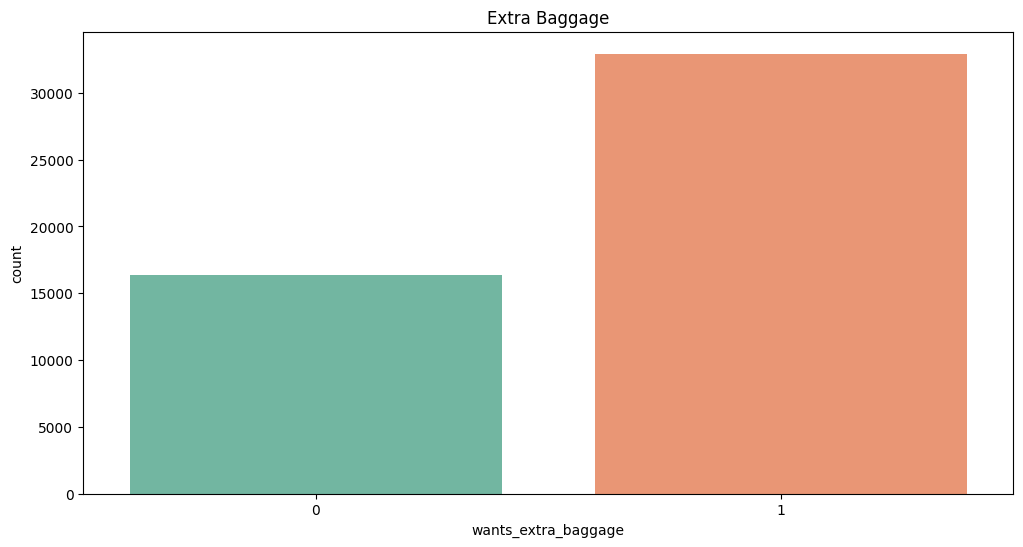

In [28]:
plt.figure(figsize=(12,6))
plt.title('Extra Baggage')
sns.countplot(x=df_new['wants_extra_baggage'], data=df_new, palette='Set2');

In [29]:
df_new['wants_preferred_seat'].value_counts(normalize=True)

wants_preferred_seat
0    0.704369
1    0.295631
Name: proportion, dtype: float64

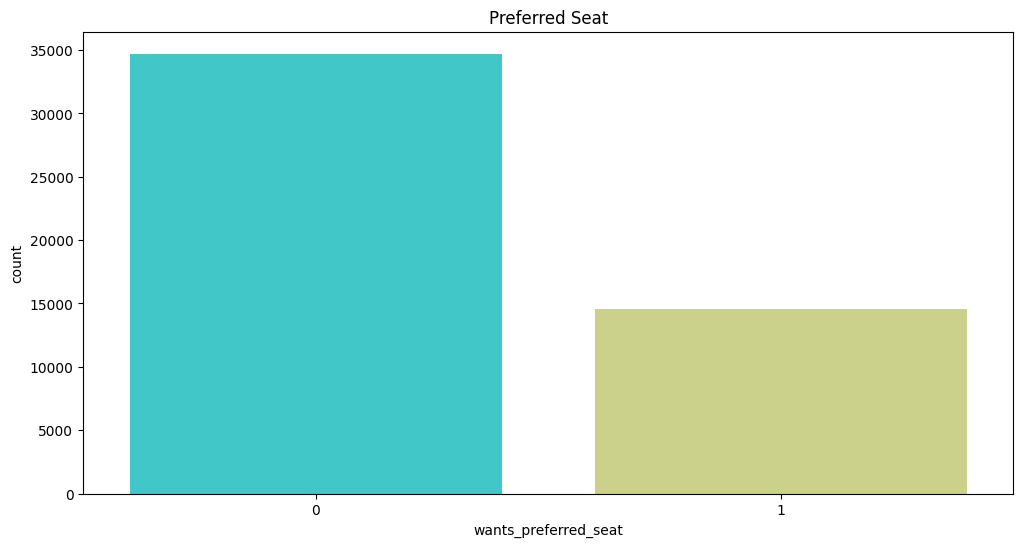

In [30]:
plt.figure(figsize=(12,6))
plt.title('Preferred Seat')
sns.countplot(x=df_new['wants_preferred_seat'], data=df_new, palette='rainbow');

In [31]:
df_new['wants_in_flight_meals'].value_counts(normalize=True)

wants_in_flight_meals
0    0.573365
1    0.426635
Name: proportion, dtype: float64

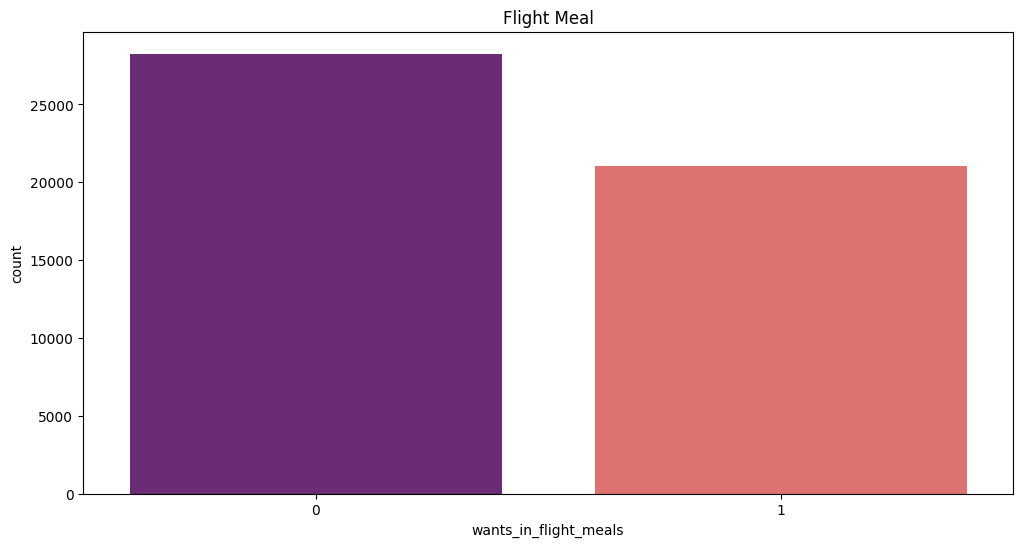

In [32]:
plt.figure(figsize=(12,6))
plt.title('Flight Meal')
sns.countplot(x=df_new['wants_in_flight_meals'], data=df_new, palette='magma');

In [33]:
df['booking_complete'].value_counts(normalize=True)

booking_complete
0    0.850023
1    0.149977
Name: proportion, dtype: float64

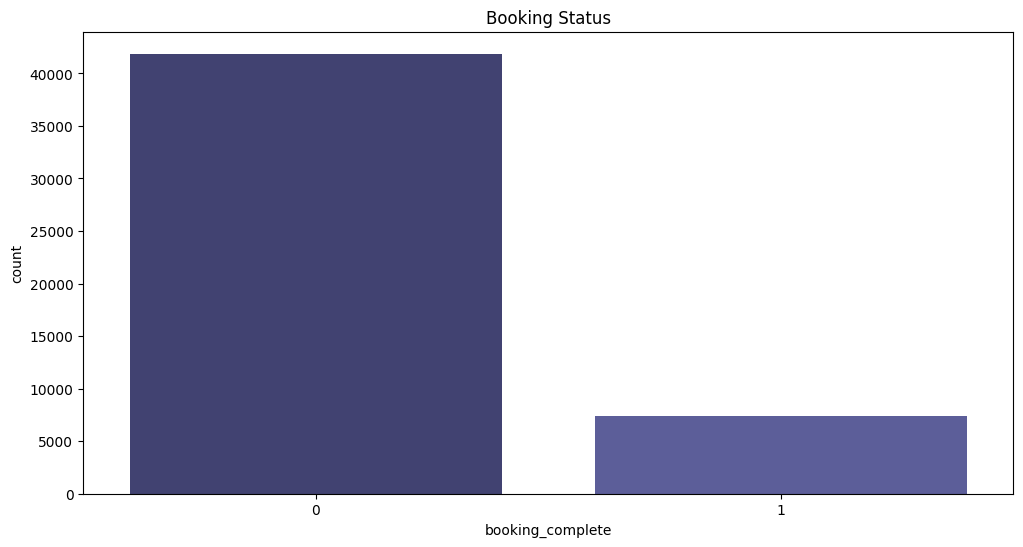

In [34]:
plt.figure(figsize=(12,6))
plt.title('Booking Status')
sns.countplot(x=df_new['booking_complete'], data=df_new, palette='tab20b');

## Insight

1. The highest volume of bookings originates from Australia, contributing significantly to the overall reservation numbers.
218. Almost all reservations, at approximately 90%, were made using online booking channels.3
19. Around two-thirds of passengers, or 67%, expressed a preference for additional baggage when making their book.ng4

20. Approximately 70% of customers opt not to select their preferred seating arrangements during the reservation proc5s.

21. A notable majority, around 57%, of customers do not have a specified preference for in-flight 6als.

22. Virtually all passengers, about 99%, choose Round Trip bookings as their preferred travel7ption.

23. Single travelers make up the majority, accounting for around 62% of all p8sengers.

24. A significant portion, approximately 85%, of customers do not proceed to complete the entire b.f abandonment.on-completion.

In [35]:
X = df.drop('booking_complete', axis=1)
y = df.booking_complete

In [36]:
for col_name in X.select_dtypes("object"):
    X[col_name], _ = X[col_name].factorize()

In [37]:
X.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

In [38]:
from sklearn.preprocessing import MinMaxScaler
# Function for scaling 
def scaler(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X

In [39]:
from sklearn.model_selection import train_test_split
# Splitting the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

## Model 1 : Random forest classifier with top 6 features

In [41]:
features = ['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay','num_passengers']
X = df[features]
# one-hot-encoding
X = pd.get_dummies(X, columns=features)
X = scaler(X)
y = df.booking_complete

model = RandomForestClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_val)

In [42]:
print('Accuracy Score :', accuracy_score(y_val, preds)*100)
print('AUC Score :', roc_auc_score(y_val, preds))

Accuracy Score : 84.94470934361368
AUC Score : 0.5400930878951054


## Model 2 : Random forest classifier with all features

In [43]:
X = df.drop('booking_complete',axis=1)
# one-hot-encoding
X = pd.get_dummies(X)
X = scaler(X)
y = df.booking_complete

model = RandomForestClassifier()
model.fit(X_train, y_train)
forest_preds = model.predict(X_val)

In [44]:
print('Accuracy Score :', accuracy_score(y_val, forest_preds)*100)
print('AUC Score :', roc_auc_score(y_val, forest_preds))

Accuracy Score : 84.97514456731257
AUC Score : 0.5383250954189238


## Model 3 : XGB classifier with top 6 features

In [45]:
from xgboost import XGBClassifier

X = df[features]
# one-hot-encoding
X = pd.get_dummies(X, columns=features)
X = scaler(X)
y = df.booking_complete

model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)
predictions = model.predict(X_val)

In [46]:
print('Accuracy Score :', accuracy_score(y_val, predictions)*100)
print('AUC Score :', roc_auc_score(y_val, predictions))

Accuracy Score : 84.72151770315511
AUC Score : 0.5474026372080568


## Model 4 : XGB classifier with all features

In [47]:
X = df.drop('booking_complete',axis=1)
# one-hot-encoding
X = pd.get_dummies(X)
X = scaler(X)
y = df.booking_complete

model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)
xgb_preds = model.predict(X_val)

In [48]:
print('Accuracy Score :', accuracy_score(y_val, xgb_preds)*100)
print('AUC Score :', roc_auc_score(y_val, xgb_preds))

Accuracy Score : 84.72151770315511
AUC Score : 0.5474026372080568


In [49]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores

booking_origin_Australia    0.029261
booking_origin_Malaysia     0.021485
flight_duration             0.019255
trip_type_RoundTrip         0.008782
wants_extra_baggage         0.007736
                              ...   
route_HNDSUB                0.000000
route_HNDSYD                0.000000
route_HNDTRZ                0.000000
route_HYDMRU                0.000000
booking_origin_Vietnam      0.000000
Name: MI Scores, Length: 917, dtype: float64

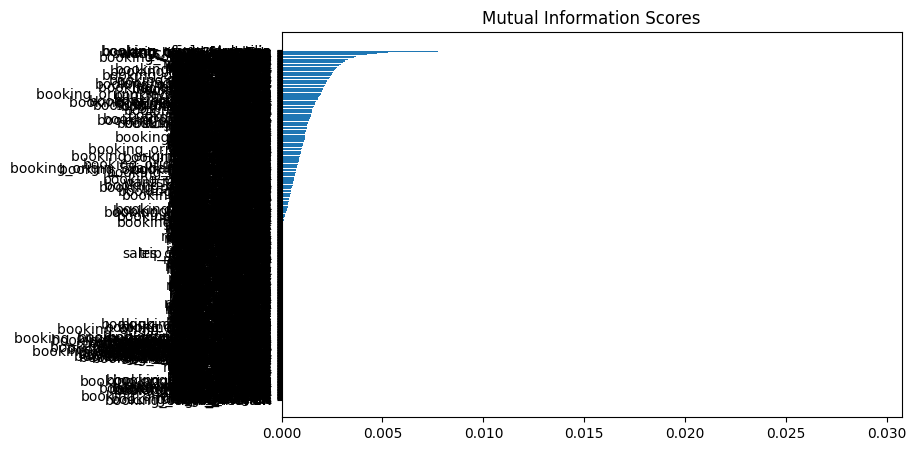

In [50]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)